In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('C:\\python learning\\covid_worldwide.csv')
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"10,41,96,861","11,32,935","10,13,22,779","17,41,147","1,15,98,32,679","33,48,05,269"
1,2,India,"4,46,82,784","5,30,740","4,41,50,289","1,755","91,52,65,788","1,40,66,31,776"
2,3,France,"3,95,24,311","1,64,233","3,92,64,546","95,532","27,14,90,188","6,55,84,518"
3,4,Germany,"3,77,79,833","1,65,711","3,73,98,100","2,16,022","12,23,32,384","8,38,83,596"
4,5,Brazil,"3,68,24,580","6,97,074","3,59,19,372","2,08,134","6,37,76,166","21,53,53,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"6,26,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [68]:
# df.columns = df.columns.str.replace(" ", "_", regex= True)

In [73]:
df.head(5)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"10,41,96,861","11,32,935","10,13,22,779","17,41,147","1,15,98,32,679","33,48,05,269"
1,2,India,"4,46,82,784","5,30,740","4,41,50,289","1,755","91,52,65,788","1,40,66,31,776"
2,3,France,"3,95,24,311","1,64,233","3,92,64,546","95,532","27,14,90,188","6,55,84,518"
3,4,Germany,"3,77,79,833","1,65,711","3,73,98,100","2,16,022","12,23,32,384","8,38,83,596"
4,5,Brazil,"3,68,24,580","6,97,074","3,59,19,372","2,08,134","6,37,76,166","21,53,53,593"


In [5]:
df.isna().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [6]:
df = df.fillna("0")

In [7]:
df.isna().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [8]:
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [9]:
df["Total Cases"] = df["Total Cases"].str.replace(",", "", regex=True).astype(float)

In [10]:
df["Total Deaths"] = df["Total Deaths"].str.replace(",", "", regex=True).astype(float)

In [11]:
df["Total Recovered"] = df["Total Recovered"].str.replace(",", "", regex=True).astype(float)

In [12]:
df["Active Cases"] = df["Active Cases"].str.replace(",", "", regex=True).astype(float)

In [13]:
df["Total Test"] = df["Total Test"].str.replace(",", "", regex=True).astype(float)

In [14]:
df["Population"] = df["Population"].str.replace(",", "", regex=True).astype(float)

In [15]:
df.head(5)


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08


In [16]:
df.describe()

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231.000000,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,116.000000,2.923460e+06,2.927706e+04,2.721732e+06,8.351410e+04,2.996123e+07,2.812322e+07
std,66.828138,9.479286e+06,1.041073e+05,9.116089e+06,7.344789e+05,1.133726e+08,1.016625e+08
min,1.000000,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,58.500000,2.400100e+04,1.795000e+02,1.208250e+04,1.850000e+01,2.260585e+05,4.063530e+05
50%,116.000000,2.065920e+05,1.965000e+03,1.315590e+05,7.390000e+02,1.671684e+06,5.511370e+06
75%,173.500000,1.296146e+06,1.390850e+04,1.255186e+06,9.328500e+03,1.148478e+07,2.152480e+07
max,231.000000,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


Organising the data into top 10 countries with the most deaths

In [17]:
Topdeaths = df[["Country", "Total Deaths"]].sort_values(by= "Total Deaths", ascending=False)
Topdeaths= Topdeaths.head(10)
Topdeaths

,Country,Total Deaths
0,USA,1132935.0
4,Brazil,697074.0
1,India,530740.0
9,Russia,395108.0
18,Mexico,332198.0
34,Peru,218931.0
8,UK,204171.0
7,Italy,186833.0
3,Germany,165711.0
2,France,164233.0


Bar Graph to show the countries with the top 10 amount of deaths

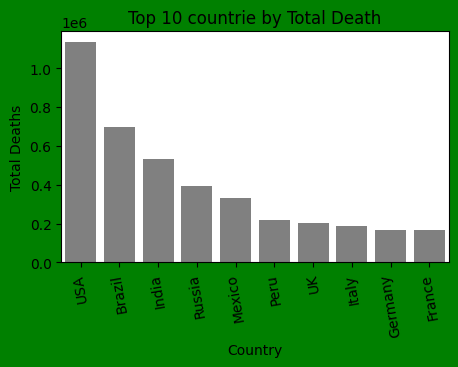

In [18]:
plt.figure(figsize=(5, 3), facecolor= "green")
graph = sns.barplot(x= "Country", y= "Total Deaths", color= "grey", data= Topdeaths)
plt.xticks(rotation= 100)
graph.set_title("Top 10 countrie by Total Death")
plt.show()

Organising the data to show top 10 countries with the most amount of recovered

In [19]:
Toprecovered = df[["Total Recovered", "Country"]].sort_values(by = "Total Recovered", ascending= False)
Toprecovered= Toprecovered.head(10)
Toprecovered

,Total Recovered,Country
0,101322779.0,USA
1,44150289.0,India
2,39264546.0,France
3,37398100.0,Germany
4,35919372.0,Brazil
6,29740877.0,S. Korea
7,25014986.0,Italy
8,24020088.0,UK
5,21567425.0,Japan
9,21356008.0,Russia


Text(0.5, 0, 'Top country')

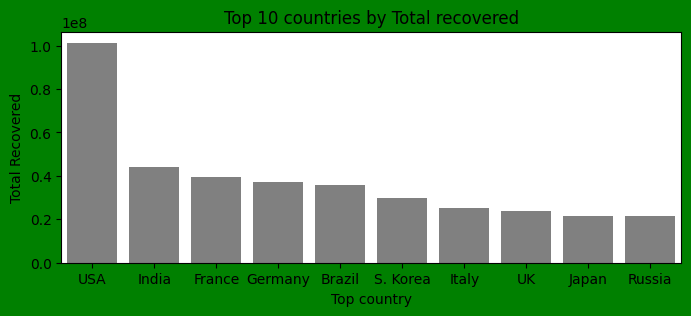

In [20]:
plt.figure(figsize= (8, 3), facecolor= "green")
graph = sns.barplot(x= "Country", y= "Total Recovered", color= "grey", data= Toprecovered)
plt.title("Top 10 countries by Total recovered")
plt.xlabel("Top country")

Compare the Deaths versus Recoveries for Top 20 countries with most deaths


In [21]:
Topcountries = df[["Total Deaths", "Total Recovered", "Country"]].sort_values(by= "Total Deaths", ascending=False)
Topcountries= Topcountries.head(20)
Topcountries

,Total Deaths,Total Recovered,Country
0,1132935.0,101322779.0,USA
4,697074.0,35919372.0,Brazil
1,530740.0,44150289.0,India
9,395108.0,21356008.0,Russia
18,332198.0,6606633.0,Mexico
34,218931.0,4258688.0,Peru
8,204171.0,24020088.0,UK
7,186833.0,25014986.0,Italy
3,165711.0,37398100.0,Germany
2,164233.0,39264546.0,France


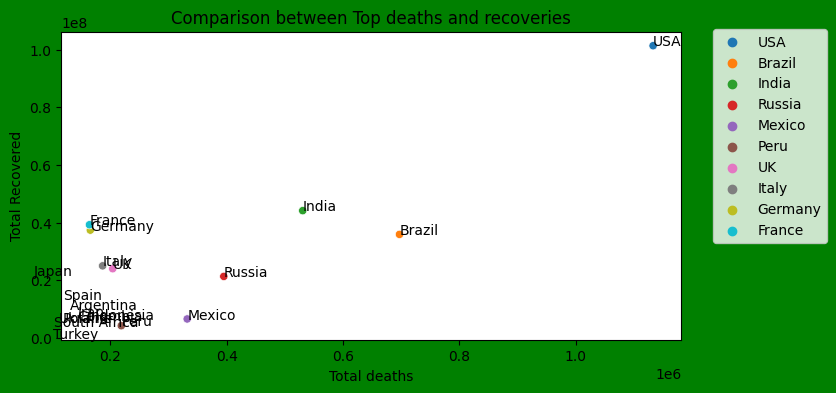

In [22]:
plt.figure(figsize=(8, 4), facecolor="Green")
sns.scatterplot(x= "Total Deaths", y= "Total Recovered", hue= "Country", data= Topcountries.head(10))
plt.title("Comparison between Top deaths and recoveries")
plt.legend(bbox_to_anchor = (1.04, 1.03), loc = "upper left")
plt.xlabel("Total deaths")
for index, row in Topcountries.iterrows():
    plt.text(row["Total Deaths"], row["Total Recovered"], row["Country"])
plt.show()


Compare Deaths with largest Population sizes


In [24]:
Compare = df[["Total Deaths", "Population", "Country"]].sort_values(by= "Population", ascending= False)
Compare


,Total Deaths,Population,Country
1,530740.0,1.406632e+09,India
0,1132935.0,3.348053e+08,USA
19,160817.0,2.791345e+08,Indonesia
52,30640.0,2.294890e+08,Pakistan
107,3155.0,2.167469e+08,Nigeria
...,...,...,...
230,0.0,1.378000e+03,Tokelau
227,0.0,7.990000e+02,Vatican City
226,13.0,0.000000e+00,Diamond Princess
90,5272.0,0.000000e+00,China


ValueError: 'left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

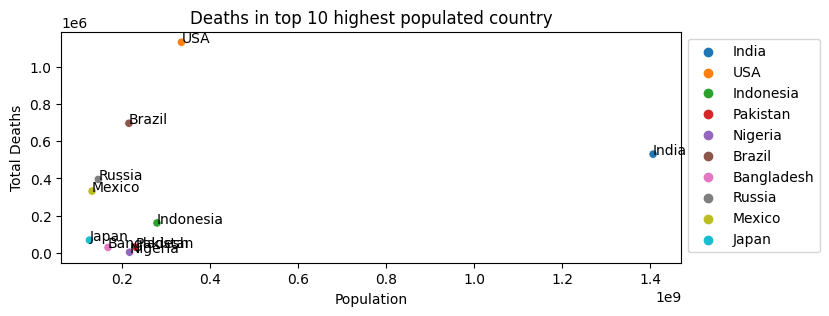

In [62]:
plt.figure(figsize=(8, 3))
gf = sns.scatterplot(x= "Population", y= "Total Deaths",hue= "Country", data= Compare.head(10))
plt.title("Deaths in top 10 highest populated country")
plt.legend(bbox_to_anchor = (1, 1))
for index, row in Compare.head(10).iterrows():
    plt.text(row["Population"], row["Total Deaths"], row["Country"])
plt.show()